# Image Retrieval

- pre-train된 ResNet feature를 사용하여 주어진 이미지와 가장 유사한 이미지를 검색.

https://pytorch.org/docs/stable/torchvision/models.html


In [ ]:
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import torch
import torchvision.models as models


print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
numpy 1.18.5
opencv 4.1.2


In [ ]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
ROOT = '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/img/'

## 이미지 불러오기

In [ ]:
import glob

imgs_name = glob.glob(ROOT + 'bow/*.png') # 카메라 위치 정보 매칭을 위해 따로 정의해둔다.
imgs = [cv.imread(img) for img in imgs_name]
print(len(imgs))

30


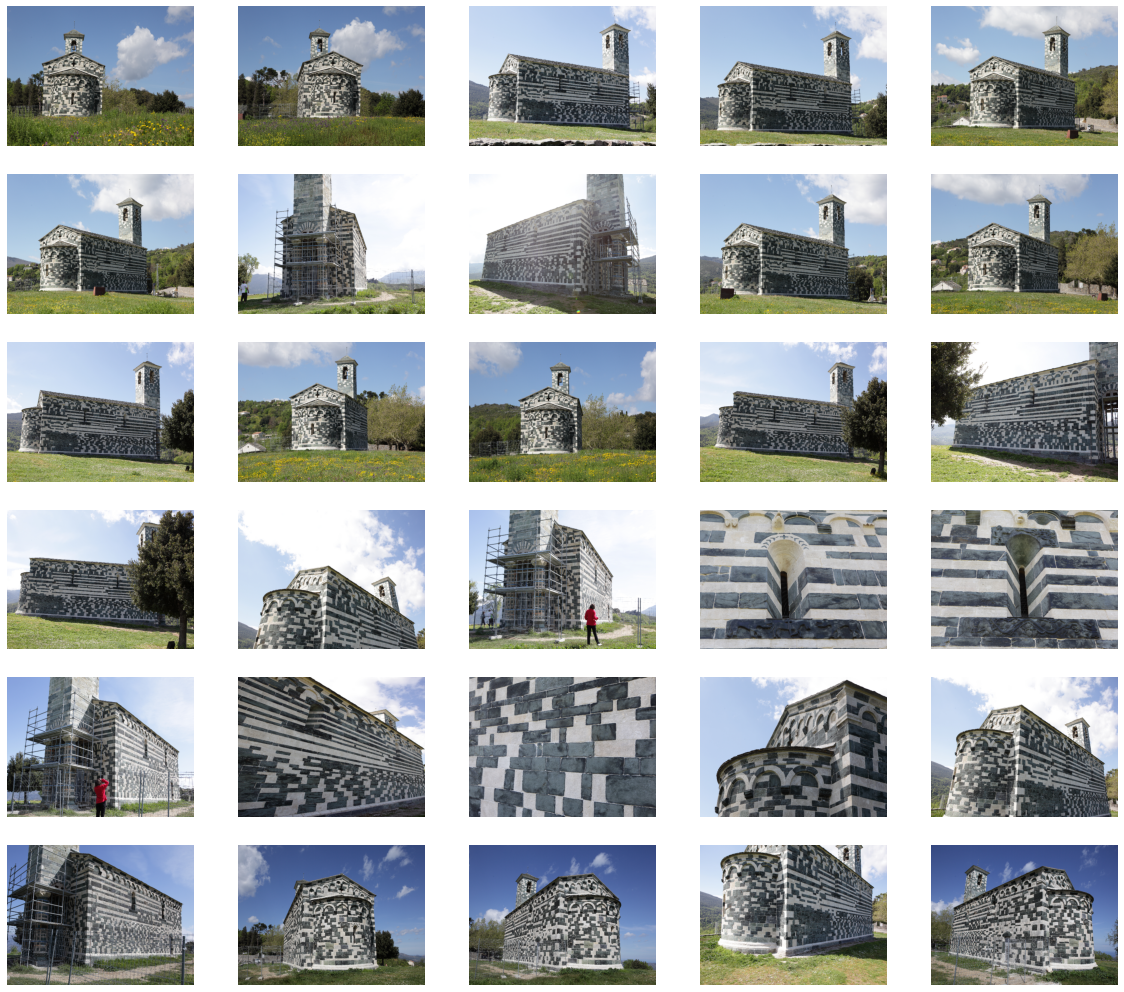

In [ ]:
plt.figure(figsize=(20,18))
for i, img in enumerate(imgs):
    plt.subplot(6,5,i+1)
    plt.imshow(img[:,:,::-1])
    plt.axis('off')
plt.show()

## ResNet feature 를 사용한 Image Retrieval

pre-train된 ResNet을 사용하여 주어진 이미지에 대해 가장 가까운 이미지를 찾는다. 

- [pytorch로 ResNet 가져오기](https://pytorch.org/docs/stable/torchvision/models.html)

**과제**

- pre-train된 ResNet으로 주어진 이미지들에 대한 feature를 구하시오.

In [ ]:
img_tensor = torch.zeros((((30, 3, 480, 640)))) # tensor로 변환해보자
for i, img in enumerate(imgs):
    img_tensor[i][0] = torch.tensor(img[:,:,0])
    img_tensor[i][1] = torch.tensor(img[:,:,1])
    img_tensor[i][2] = torch.tensor(img[:,:,2])

model = models.resnet34(pretrained=True) # resnet34로 model를 선언하고 (그냥 조금 성능이 좋은 모델을 사용하고 싶었다..)
feature = model(img_tensor) # model에 위에서 변환한 이미지 텐서 값을 통과시켜 feature값을 추출한다.

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
print('tensor size: ', img_tensor.shape)
print('feature size: ', feature.shape)

tensor size:  torch.Size([30, 3, 480, 640])
feature size:  torch.Size([30, 1000])


**과제**

- 추출한 feature들을 바탕으로 주어진 `queryIdx` 번째 이미지와 가장 유사한 이미지를 찾아 순서대로 보여주는 `display()`함수를 완성하고, 결과 그림에 대해 설명하시오.

In [ ]:
def display(queryIdx, features) :
  # to-do : 추출한 feature들의 거리가 유사한 순서대로 보여주기
    beforeanswer = []
    answer = 0
    for i in range(len(features)):
        for j in range(len(features[0])):
            answer += (features[queryIdx][j] - features[i][j]) ** 2
                # features[queryIdx]에 맞춰야하는 값이 들어있으니 그것을 기준으로 모든 feature을 빼준 것의 제곱을 더한다.
        beforeanswer.append([i, answer]) # 변환한 feature값 차의 제곱합을 index와 함께 저장한다.
        answer = 0
    beforeanswer = sorted(beforeanswer, key=lambda x: x[1]) # 그것을 합을 기준으로 정렬한다. 오름차순으로 정렬되므로 작은 값부터.
    idxs = [row[0] for row in beforeanswer] # 그것의 index를 idxs에 저장한다.

    plt.title('query image')
    plt.imshow(imgs[queryIdx][:,:,::-1])
    plt.show()
  
    plt.figure(figsize=(20,18))
    for i, idx in enumerate(idxs):
        plt.subplot(6,5,i+1)
        plt.imshow(imgs[idx][:,:,::-1])
        plt.axis('off')
    plt.show()

    plt.figure(figsize=(16,2))
    plt.subplot(121)
    plt.title('query image')
    plt.bar(np.arange(1000), features[queryIdx])
    plt.subplot(122)
    plt.title('1st closest image')
    plt.bar(np.arange(1000), features[idxs[1]])
    plt.show()

    plt.figure(figsize=(16,2))
    plt.subplot(121)
    plt.title('query image')
    plt.bar(np.arange(1000), features[queryIdx])
    plt.subplot(122)
    plt.title('10th closest image')
    plt.bar(np.arange(1000), features[idxs[10]])
    plt.show()

    plt.figure(figsize=(16,2))
    plt.subplot(121)
    plt.title('query image')
    plt.bar(np.arange(1000), features[queryIdx])
    plt.subplot(122)
    plt.title('29th closest image')
    plt.bar(np.arange(1000), features[idxs[29]])
    plt.show()

> 위 코드는 추출된 feature값들의 차이의 제곱으로 거리 유사도를 검사해 차이가 작은 값으로 정렬한 대로 사진이 출력되게 작성했다.
>
> feature값의 차의 제곱 합이 작은 순으로 정렬되므로 나름 비슷하게 출력될 것 이다.

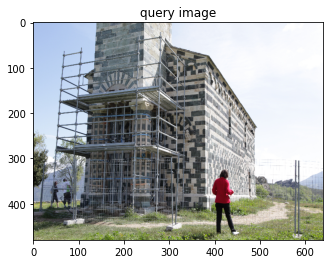

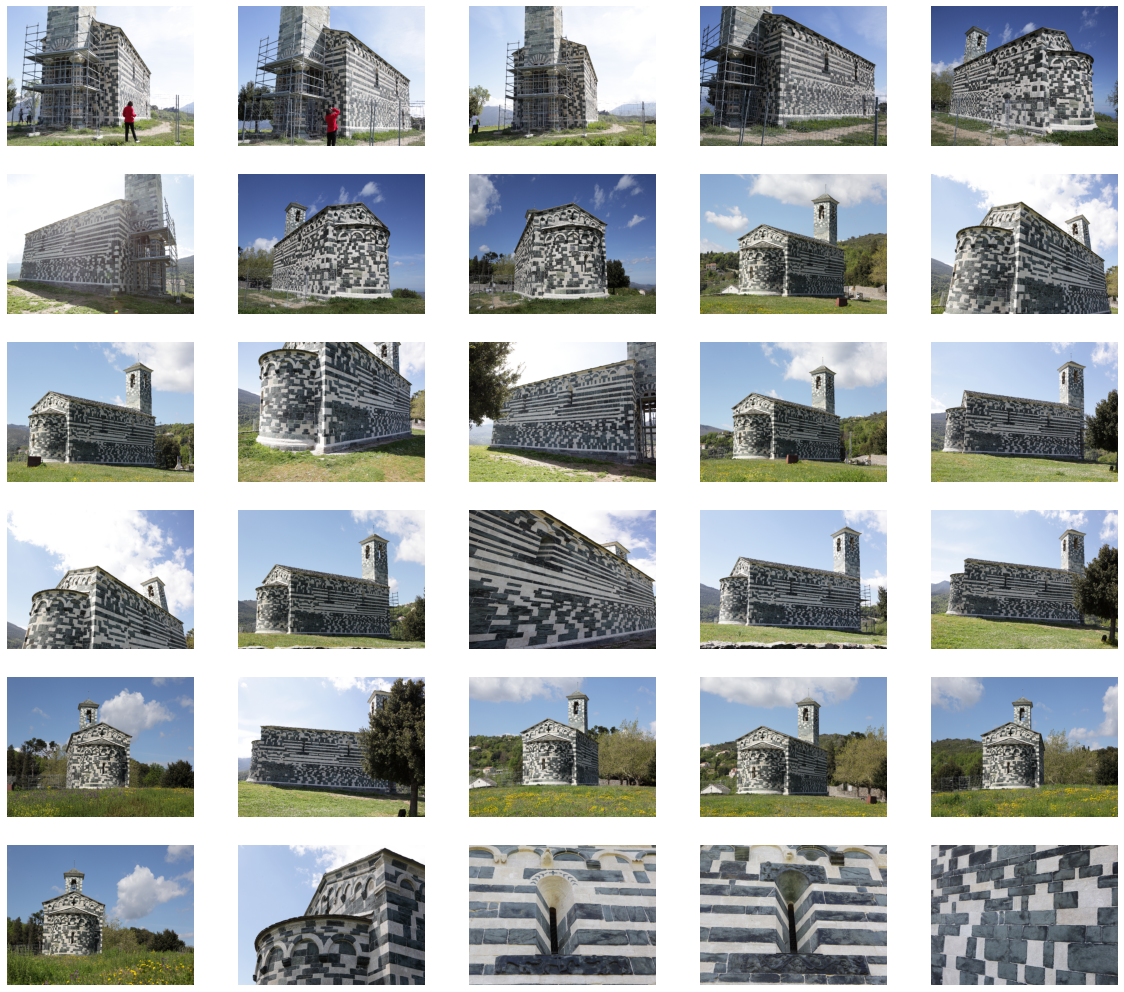

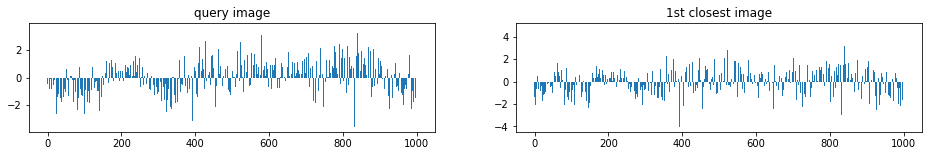

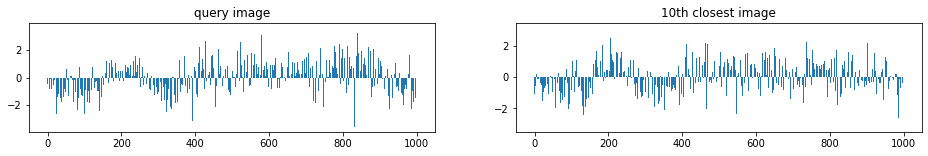

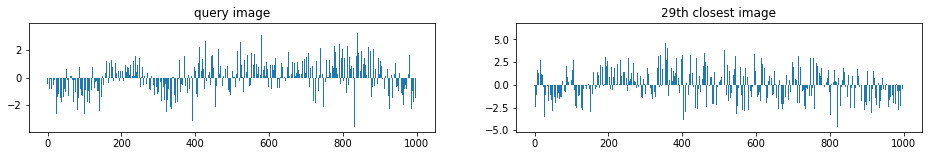

In [ ]:
display(17, feature.detach().numpy())

**과제**

- bag of word 기법을 설명하고, bag of word 기법으로 image retrieval을 진행했을 때와 위 방법으로 진행했을 때의 차이점을 서술하시오.

### bag of word

**bag of word**는 feature들로 코드북(code book)을 생성한다.

코드북은 feature들을 대표할 수 있는 값들로 구성된다. 다수의 이미지들로 부터 추출한 feature들에 대해 대표 feautre을 획득하는데, 클러스터링(k-means clustering)으로 획득한다. 
이 코드북에 있는 대표 feature들을 코드워드(code word)라고 부른다.

각각의 이미지들을 이 코드워드들의 히스토그램으로 표현한다. 이 히스토그램은 이미지당 하나씩 나오고 히스토그램의 모양에 따라 다른 이미지의 히스토그램과 비교하여 유사도를 판단한다.

이렇게 진행하면 코드워드의 종류와 그것의 양을 파악하는 것을 바탕으로 히스토그램의 모양을 파악하여 유사도의 정확도가 높아진다.

반면에, 위의 방법대로 **오차 제곱의 합**으로 하면 어떤 부분의 feature값의 차가 적은지 어디가 차가 높은지 알 수 없다. 즉, 어느 코드워드에서 유사도가 떨어지는지 알 수가 없다. 그냥 모든 차의 제곱을 더해버렸기 때문에 정확도가 떨어질 수 밖에 없다.

## 추가 점수 과제

- 주어진 views.txt 파일은 [meshroom](https://alicevision.org/)을 이용해 계산한 카메라의 위치 정보를 저장하고 있다. 이 파일과 위에서 수행한 것의 결과를 비교하시오.

- 주어진 파일을 정답값(ground-truth)으로 삼아 위에서 수행한 image retrieval의 성능을 개선하시오.



In [ ]:
filename = ROOT + 'bow/views.txt'
with open(filename) as data:
    lines = data.readlines()
 
view = []
views = []
cnt = 0
for line in lines:
    view.append(line.split())

view = sorted(view, key=lambda x: x[0])

for i in range(len(imgs_name)):
    for j in range(len(view)):
        if view[j][0][:8] == imgs_name[i][69:77]: # 파일 이름으로 구분
            views.append(view[j][1:4])
            cnt = 1
    if cnt != 1:
        views.append('0') # 해당하는 바가 없다면 0을 넣는다.
    cnt = 0
views = ["".join(v) for v in views]

feature_array = feature.detach().numpy()

for i in range(len(feature_array)):
    print(i+1, "\'s feature :", feature_array[i][:6], end="\t") # 일단 feature 6개만 출력.
    print("camera views : ", views[i])

1 's feature : [-1.5820279   0.09534594 -2.022884   -2.2721527  -1.2707666  -1.4442824 ]	camera views :  ['-2.0414055938534368','0.089140652281817168','0.51978931498669978']
2 's feature : [-1.8658274 -0.5389375 -1.8193996 -2.4019113 -2.1839268 -1.9703572]	camera views :  ['-2.1219349979832081','0.13061269893876126','0.7502392856429978']
3 's feature : [-2.5349803  -1.8547571  -0.59602326 -2.1189935  -1.6796738  -0.92470354]	camera views :  ['-0.44136902199658218','-0.042814010052737182','-0.33678866025156656']
4 's feature : [-1.7410337  -1.6651207  -0.53080606 -1.1956291  -0.86558145 -0.31774125]	camera views :  ['-0.65894515038866308','-0.071204366978039779','-0.41187482458280306']
5 's feature : [-0.8532779   0.01800571 -1.3383856  -0.85530597 -0.98582304 -0.14152882]	camera views :  ['-1.4809536701573784','-0.14834097002843905','-0.37620707826448962']
6 's feature : [-1.2561877  -0.741168   -0.78702915 -0.7920903  -1.8751937  -0.21997485]	camera views :  ['-1.1986446672625464','-0

> 결과를 비교해 보았다.
 ---
> 파일에 있는 카메라의 위치 정보를 정답으로 삼아 성능을 개선시키려면 reweighted least square을 구현하면 된다고 생각한다.
> txt에 있는 정보를 가중치로 두고 오차가 큰 매칭이 결과에 영향을 많이 미치지 않도록 해주는 것이다.
>
> 이렇게 구현 과정이나 흐름은 감이 오지만, 어떻게 연산을 하여 코드로 구현해야 할지 모르겠다.
>
> 우선 한 이미지당 feature가 1000개 있고 이것을 전부 가중치와 연산을 하고 합을 내면 된다고 생각한다. camara 위치가 없는 것은 예외 처리를 하면 된다. 결국 그 부분에서는 개선이 이루어지지 않는다.
>
> 한 가지 든 의문은 어떻게 개선 여부를 파악할 수 있는지이다. 정량적으로 파악할 수 없을 텐데,, 잘 모르겠다,,
>
> 만약 조금 더 생각할 시간이 주어졌다면 추가 점수 과제를 모두 완성할 수 있었을 텐데 하는 아쉬움이 남는다..

# 간단한 소감

>차량지능기초 수업은 머신러닝/딥러닝에 대해서 나름 감이 오도록 플랜이 짜여졌다는 생각이 들었다. 쏟아지는 과제에 너무 힘이 들었고 강의 내용도 쉬울 수가 없어서 어려웠지만 인공지능에 관심이 있는 사람이라면 감당할 정도의 것이라고 생각한다. 모두가 조금씩 불편한 상황이었지만 무사히 끝난 것 같다!
>
>너무 수고 많으셨습니다!